In [22]:
import os
import numpy as np
import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
from random import shuffle
from keras.optimizers import RMSprop

In [2]:
IMG_SIZE = (224, 224)
TRAIN_DIR = './train'
TEST_DIR = './test'

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = load_img(path, target_size=IMG_SIZE)  # загрузка и масштабирование изображения
        array = img_to_array(img)
        training_data.append([np.array(array), np.array(label)])
    shuffle(training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = load_img(path, target_size=IMG_SIZE)  # загрузка и масштабирование изображения
        array = img_to_array(img)
        testing_data.append([np.array(array),img_num])
    return testing_data

In [6]:
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [03:39<00:00, 113.64it/s]


In [7]:
test_data = process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:39<00:00, 125.45it/s]


In [23]:
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3))

In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1,  # один выход
                       activation='sigmoid',  # функция активации  
                       kernel_regularizer=keras.regularizers.l1(1e-3))(x)
model = Model(inputs=base_model.input, outputs=x)

In [26]:
model.compile(optimizer= RMSprop(lr=1e-4), 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [12]:
X = np.array([i[0] for i in train_data])
Y = np.array([i[1] for i in train_data])
del train_data

In [27]:
model.fit(x = X, y = Y, batch_size=25,epochs=10,verbose=1)

Epoch 1/10
25000/25000 [==============================] - 118s - loss: 0.7814 - acc: 0.9327   
Epoch 2/10
25000/25000 [==============================] - 108s - loss: 0.3617 - acc: 0.9733   
Epoch 3/10
25000/25000 [==============================] - 107s - loss: 0.2516 - acc: 0.9805   
Epoch 4/10
25000/25000 [==============================] - 106s - loss: 0.1934 - acc: 0.9836   
Epoch 5/10
25000/25000 [==============================] - 105s - loss: 0.1588 - acc: 0.9848   
Epoch 6/10
25000/25000 [==============================] - 107s - loss: 0.1377 - acc: 0.9860   
Epoch 7/10
25000/25000 [==============================] - 105s - loss: 0.1200 - acc: 0.9868   
Epoch 8/10
25000/25000 [==============================] - 103s - loss: 0.1065 - acc: 0.9881   
Epoch 9/10
25000/25000 [==============================] - 107s - loss: 0.1024 - acc: 0.9873   
Epoch 10/10
25000/25000 [==============================] - 101s - loss: 0.0975 - acc: 0.9884   


In [28]:
model.save('1_dvsc.model')

In [ ]:
#keras.models.load_model('1_dvsc.model')

In [29]:
X_test = np.array([i[0] for i in test_data])

In [41]:
pred = model.predict(X_test)

In [42]:
pred= np.clip(pred,0.0125,0.9875)

In [46]:
id_array = np.array([i[1] for i in test_data])

In [47]:
with open('submission.csv','w') as f:
    f.write('id,label\n')

In [48]:
with open('submission.csv','a') as f:
    a = 0
    for i in id_array:
        f.write('{},{}\n'.format(i,pred[a][0]))
        a += 1

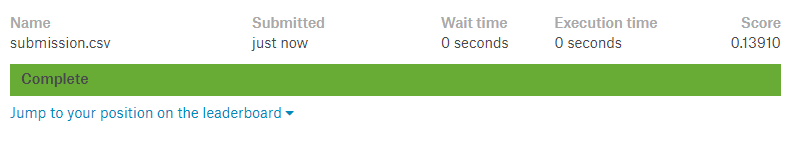

In [49]:
from IPython.display import Image
Image(filename='Screenshot_1.png')